# Week7-机器学习-实战流程
- sklearn 中文社区： https://scikit-learn.org.cn/
- KMeans聚类：https://scikit-learn.org.cn/view/383.html
- 英文官网：https://scikit-learn.org/stable/

# 一、需求分析
## 1.1	任务描述

- **kaggle入门级比赛——泰坦尼克号之灾**- [kaggle-Titanic主页](https://www.kaggle.com/c/titanic)
- 在学习机器学习相关项目时，Titanic生存率预测项目也通常是入门练习的经典案例。Kaggle平台为我们提供了一个竞赛案例“Titanic: Machine Learning from Disaster”，在该案例中，我们将探究什么样的人在此次海难中幸存的几率更高，并通过构建预测模型来预测乘客生存率。
- 本质是一个分类任务。目标是预测乘客能否生还以及生还的机率。


## 1.2	已具备数据描述
**数据说明：**
- PassengerID（ID）
- **Survived (存活与否)    Label字段**
- Pclass（客舱等级，较为重要）
- Name（姓名，可提取出更多信息）
- Sex（性别，较为重要）
- Age（年龄，较为重要）
- Parch（直系亲友）
- SibSp（旁系）
- Ticket（票编号）
- Fare（票价）
- Cabin（客舱编号）
- Embarked（上船的港口编号）

**数据集合：**
- titanic_data.csv 训练数据 （891条）有Label：Survived字段

## 1.3	拟采用的机器学习方法
- 语言：python
- 编译器：Jupyter Notebook
- 主要用到的三方库：numpy、pandas、matplotlib、sklearn等
- 数据开发流程： 数据加载，数据清洗，特征工程，数据建模，模型可视化，模型预测

# 二、机器学习建模过程
## 2.1	数据加载
- 使用pandas的read_csv读取训练集和测试集

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt

In [4]:
# ./data/titanic_data.csv
data = pd.read_csv('./data/titanic_data.csv')
# 查看训练集数据预览
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,120.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
# 查看训练集基本信息，缺失值情况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 通过数据预览，初步可以确定：
    1. PassengerId：丢弃
    2. Name：暂时可以丢弃, 但是可以提取称为: Mr, Miss, Doctor, Mster
    3. Sex：编码
    4. Age：填充
    5. Ticket：丢弃
    6. Cabin：待定
    7. Embarked：待定

In [8]:
# 查看训练数据的基本统计信息
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.629090,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,16.928488,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,-58.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,145.000000,8.000000,6.000000,512.329200


## 2.2	数据预处理
- 一个一个字段查看
- 通过图表化的方式，来具体观察一下数据之间的关系

In [9]:
# 设置中文支持
import matplotlib as mpl
mpl.rcParams["font.family"] = "SimHei"   # SimHei 中文黑体
mpl.rcParams["axes.unicode_minus"]=False

### （0）PassengerId  891 non-null    int64  ：乘客编号。 结论：直接丢弃

### （1）Survived     891 non-null    int64  ：目标字段。 结论：样本较均衡, 无需上下采样

In [11]:
# 正负样本的比例
print("正负样本的比例: \n", data['Survived'].value_counts())

正负样本的比例: 
 0    549
1    342
Name: Survived, dtype: int64


### （2）Pclass       891 non-null    int64：客舱等级。 结论：等级越高, 获救的概论越大。数据无需处理

In [13]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, '未获救(0)：乘客客舱等级人数')

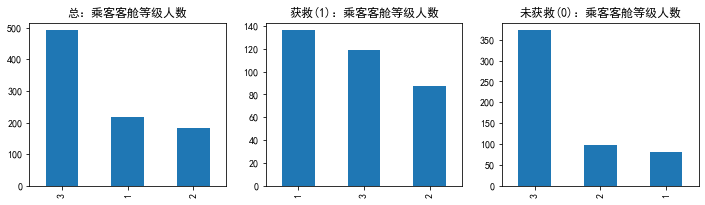

In [16]:
# 乘客客舱等级分布
plt.figure(figsize=(12,3))
plt.subplot(1, 3, 1)
data['Pclass'].value_counts().plot(kind='bar')
plt.title(u"总：乘客客舱等级人数")

plt.subplot(1, 3, 2)
data['Pclass'][data['Survived']==1].value_counts().plot(kind='bar')
plt.title(u"获救(1)：乘客客舱等级人数")

plt.subplot(1, 3, 3)
data['Pclass'][data['Survived']==0].value_counts().plot(kind='bar')
plt.title(u"未获救(0)：乘客客舱等级人数")


### （3）Name         891 non-null    object：姓名。结论：暂且丢弃

### （4）Sex          891 non-null    object：性别。 结论：无缺失, 字符串统一编码

Text(0.5, 1.0, '未获救(0)：性别分布')

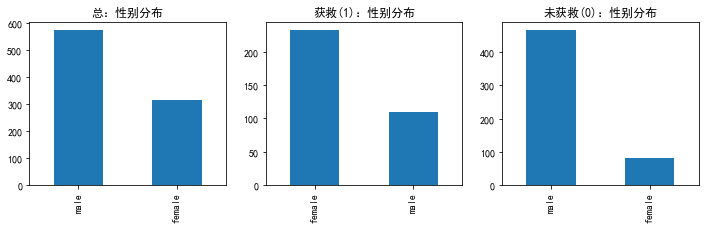

In [21]:
# 看看性别对生还率的影响
plt.figure(figsize=(12,3))

plt.subplot(1, 3, 1)
data['Sex'].value_counts().plot(kind='bar')
plt.title(u"总：性别分布")

plt.subplot(1, 3, 2)
data['Sex'][data['Survived']==1].value_counts().plot(kind='bar')
plt.title(u"获救(1)：性别分布")

plt.subplot(1, 3, 3)
data['Sex'][data['Survived']==0].value_counts().plot(kind='bar')
plt.title(u"未获救(0)：性别分布")


In [66]:
# 性别：独热处理 pd.get_dummies
sex_oh = pd.get_dummies(data['Sex'], prefix='Sex')
# 处理完后一起拼接起来
sex_oh.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


### （5）Age 714 non-null float64：年龄。 结论：有异常, 有缺失, 负数转正, 大于100->100, 填充缺失

负数:  Series([], Name: Age, dtype: float64)
100以上:  Series([], Name: Age, dtype: float64)


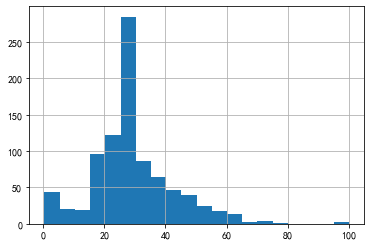

In [67]:
# 查看年龄分布
data['Age'].hist(bins=20)

# 看到有负数 → 错误值， 超过100岁以上还有很多
print('负数: ', data['Age'][data['Age'] < 0])
print('100以上: ', data['Age'][data['Age'] > 100])

<AxesSubplot:>

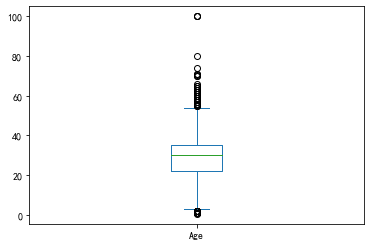

In [68]:
# 年龄箱线图
data['Age'].plot(kind='box')

In [69]:
# 3σ法则：
#最小值  是均值减去3倍的标准差  小于这个值 可以认定为离群值
#最大值  是均值加上3倍的标准差  大于这个值 可以认定为离群值
mean = data['Age'].mean()
std = data['Age'].std()
print("均值=", mean)
print("标准差=", std)
print("3sigma, max=", mean+3*std)
print("3sigma, min=", mean-3*std)

均值= 29.96382352941171
标准差= 13.61836747388132
3sigma, max= 70.81892595105566
3sigma, min= -10.891278892232247


填充前, 缺失数:  0
填充后, 缺失数:  0


C:\Users\Viruse\AppData\Local\Temp/ipykernel_3168/3994039523.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'][data['Age'] > 100] = 100


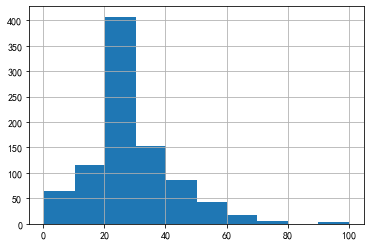

In [70]:
# （1）处理负数
data['Age'] = data['Age'].abs()
data['Age'].hist()

# （2）处理大于100的,按100填充
data['Age'][data['Age'] > 100] = 100

# （3）填充缺失值
print("填充前, 缺失数: ", data['Age'].isnull().sum())
data['Age'].fillna(value=data['Age'].mean(), inplace=True)
print("填充后, 缺失数: ", data['Age'].isnull().sum())


<AxesSubplot:>

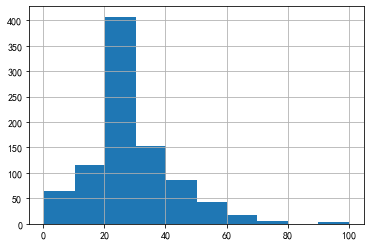

In [71]:
# Age处理后分布
data['Age'].hist()

### （6）SibSp 891 non-null    int64：旁系亲友。 结论：无异常, 无缺失, 暂不处理, 保留

<AxesSubplot:>

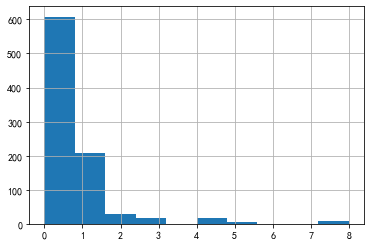

In [72]:
data['SibSp'].hist()

### （7）Parch 891 non-null int64：直系亲友。 结论：

<AxesSubplot:>

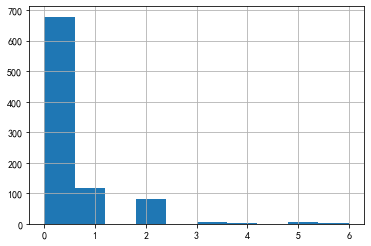

In [73]:
data['Parch'].hist()

### （8）Ticket 891 non-null object：票号。 结论：

In [74]:
data['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

### （9）Fare 891 non-null float64：票价。 结论：有异常, 盖帽处理, 无缺失

<AxesSubplot:>

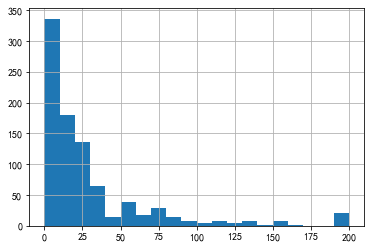

In [75]:
data['Fare'].hist(bins=20)

In [76]:
#最小值  是均值减去3倍的标准差  小于这个值 可以认定为离群值
#最大值  是均值加上3倍的标准差  大于这个值 可以认定为离群值
print('3sigma max = ', data['Fare'].mean() + 3 * data['Fare'].std())

3sigma max =  146.73633934555772


In [77]:
# 181以上数据查看
data['Fare'][data['Fare'] > 181]

27     200.0
88     200.0
118    200.0
258    200.0
299    200.0
311    200.0
341    200.0
377    200.0
380    200.0
438    200.0
527    200.0
557    200.0
679    200.0
689    200.0
700    200.0
716    200.0
730    200.0
737    200.0
742    200.0
779    200.0
Name: Fare, dtype: float64

C:\Users\Viruse\AppData\Local\Temp/ipykernel_3168/3472786529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare'][data['Fare'] > 200] = 200


<AxesSubplot:>

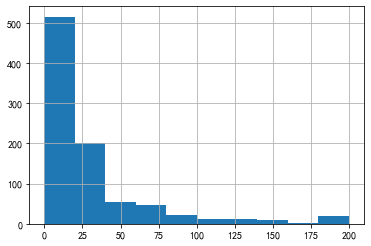

In [78]:
# 3σ盖帽法，选取盖帽点 选择300作为盖帽点
data['Fare'][data['Fare'] > 200] = 200
data['Fare'].hist()

### （10）Cabin 204 non-null object：客舱编号。 结论：缺失值填充。

In [50]:
# 客舱编号都有用吗？选取第一位
data['Cabin'].value_counts()
data['Cabin_lst'] = data['Cabin'].str[0]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_lst
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,100.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [52]:
# Cabin 填充，利用U（Unknown）填充缺失值
data['Cabin_lst'].fillna("U", inplace=True)
data['Cabin_lst'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_lst, dtype: int64

In [26]:
# Cabin 填充，利用U（Unknown）填充缺失值


,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [54]:
# 对填充U后的数据, 进行独热编码
cabin_oh = pd.get_dummies(data['Cabin_lst'], prefix='cabin')
cabin_oh.head()

,A,B,C,D,E,F,G,T,U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


### （10）Embarked 889 non-null object ：登录港口。 结论：填充缺失值，独热编码

In [55]:
# 各登船口岸上船人数
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [57]:
# （1）Embarke缺失值填充：众数S
data['Embarked'].fillna('S', inplace=True)

In [82]:
# （2）独热编码
embarked_oh = pd.get_dummies(data['Embarked'], prefix='embarke')
embarked_oh.head()

,embarke_C,embarke_Q,embarke_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


### 最后，我们把不需要的列删除，把新增的列拼接起来，形成特征矩阵X，和目标y

In [83]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_lst
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,100.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,U


In [84]:
# 目标y
y = data['Survived']
y.shape

(891,)

In [85]:
# 需要保留的
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [90]:
# 拼接，形成X
X = pd.concat([data[['Pclass','Age','SibSp','Parch','Fare']], sex_oh, cabin_oh, embarked_oh], axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,A,B,C,D,E,F,G,T,U,embarke_C,embarke_Q,embarke_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,1,100.0,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_female  891 non-null    uint8  
 6   Sex_male    891 non-null    uint8  
 7   A           891 non-null    uint8  
 8   B           891 non-null    uint8  
 9   C           891 non-null    uint8  
 10  D           891 non-null    uint8  
 11  E           891 non-null    uint8  
 12  F           891 non-null    uint8  
 13  G           891 non-null    uint8  
 14  T           891 non-null    uint8  
 15  U           891 non-null    uint8  
 16  embarke_C   891 non-null    uint8  
 17  embarke_Q   891 non-null    uint8  
 18  embarke_S   891 non-null    uint8  
dtypes: float64(2), int64(3), uint

## 2.3 训练集测试集拆分

((712, 19), (179, 19), (712,), (179,))

In [109]:
# test_size=0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 19), (179, 19), (712,), (179,))

## 2.4 数据标准化

In [110]:
# 特征数据标准化 用均值-标准差标准化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train) # transform 数据转换
X_test_std = sc.transform(X_test)

<h2 style='color:red'>以上，是数据预处理的操作，下面开始建模啦</h2>

## 2.5 数据建模与评价

In [111]:
# 导入Sklearn的算法包： 逻辑回归、SVM、决策树、集成方法随机森林
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# 导入评价指标：分类报告，精度
from sklearn.metrics import classification_report, accuracy_score 

### （1）逻辑回归

In [116]:
# 1、模型初始化
lgr = LogisticRegression()
# 2. 训练
lgr.fit(X_train_std, y_train)
# 3. 预测
y_train_pred = lgr.predict(X_train_std)
y_test_pred = lgr.predict(X_test_std)
# 4. 查看评价指标
print('逻辑回归--训练集分类报告：\n', classification_report(y_train, y_train_pred))   
print('逻辑回归--测试集分类报告：\n',classification_report(y_test, y_test_pred))   


# 逻辑回归分类的测试集的F1值是：0.78

逻辑回归--训练集分类报告：
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       440
           1       0.77      0.74      0.75       272

    accuracy                           0.81       712
   macro avg       0.80      0.80      0.80       712
weighted avg       0.81      0.81      0.81       712

逻辑回归--测试集分类报告：
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       109
           1       0.73      0.69      0.71        70

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.78       179



In [40]:
# 1、模型初始化

# 2. 训练

# 3. 预测

# 4. 查看评价指标
print('逻辑回归--训练集分类报告：\n')   
print('逻辑回归--测试集分类报告：\n')   


# 逻辑回归分类的测试集的F1值是：0.78

逻辑回归--训练集分类报告：
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       440
           1       0.78      0.74      0.76       272

    accuracy                           0.82       712
   macro avg       0.81      0.80      0.81       712
weighted avg       0.82      0.82      0.82       712

逻辑回归--测试集分类报告：
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       109
           1       0.73      0.69      0.71        70

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.78       179



### （2）决策树

In [113]:
# 1、模型初始化
dtc = DecisionTreeClassifier()
# 2. 训练
dtc.fit(X_train_std, y_train)
# 3. 预测
y_train_pred = dtc.predict(X_train_std)
y_test_pred = dtc.predict(X_test_std)
# 4. 查看评价指标
print('决策树--训练集分类报告：\n',classification_report(y_train_pred, y_train))   
print('决策树--测试集分类报告：\n',classification_report(y_test_pred, y_test))   


# 逻辑回归的测试集的F1值是：0.78
# 决策树的测试集的F1值是：0.81

决策树--训练集分类报告：
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       447
           1       0.97      0.99      0.98       265

    accuracy                           0.98       712
   macro avg       0.98      0.99      0.98       712
weighted avg       0.98      0.98      0.98       712

决策树--测试集分类报告：
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       103
           1       0.80      0.74      0.77        76

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [41]:
# 1、模型初始化

# 2. 训练
 
# 3. 预测
  
# 4. 查看评价指标
print('决策树--训练集分类报告：\n',)   
print('决策树--测试集分类报告：\n',)   


# 逻辑回归的测试集的F1值是：0.78
# 决策树的测试集的F1值是：0.81

决策树--训练集分类报告：
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       440
           1       0.99      0.97      0.98       272

    accuracy                           0.98       712
   macro avg       0.99      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712

决策树--测试集分类报告：
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.75      0.80      0.77        70

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## 2.6	模型可视化

In [130]:
# 以逻辑回归为例
# 取特征的名称
bar_x = np.array([column for column in X])
bar_y = lgr.coef_[0]
# 逻辑回归变量的w，权重
print(bar_x, bar_y)

['Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Sex_female' 'Sex_male' 'A' 'B' 'C'
 'D' 'E' 'F' 'G' 'T' 'U' 'embarke_C' 'embarke_Q' 'embarke_S'] [-0.65940906 -0.52645447 -0.41559875 -0.05676844  0.13390754  0.64143439
 -0.64143439 -0.08429004  0.09389863 -0.07601475  0.13311267  0.24843657
  0.08686061  0.14247133 -0.16325142 -0.17558474  0.09478577  0.05876236
 -0.12023257]


In [42]:
# 以逻辑回归为例
# 取特征的名称
# 逻辑回归变量的w，权重
print(bar_x, bar_y)

['Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Sex_female' 'Sex_male' 'Cabin_A'
 'Cabin_B' 'Cabin_C' 'Cabin_D' 'Cabin_E' 'Cabin_F' 'Cabin_G' 'Cabin_T'
 'Cabin_U' 'Embarked_C' 'Embarked_Q' 'Embarked_S'] [-0.67770714 -0.5554011  -0.42275847 -0.05983773  0.1275025   0.64171367
 -0.64171367 -0.08467501  0.09645532 -0.07854089  0.13844388  0.25138601
  0.08363419  0.14139919 -0.16175341 -0.17835693  0.09278837  0.05962105
 -0.11900282]


Text(0.5, 1.0, '逻辑回归各变量的权重值')

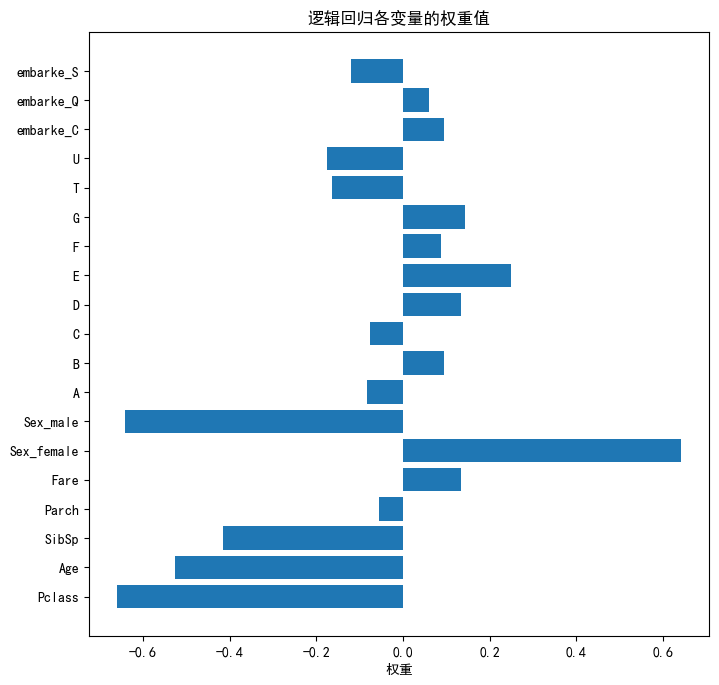

In [131]:
plt.figure(figsize=(8,8),dpi = 100)
plt.barh(bar_x,bar_y)  # 水平柱状图
plt.xlabel('权重')
plt.title('逻辑回归各变量的权重值')

Text(0.5, 1.0, '逻辑回归各变量的权重值')

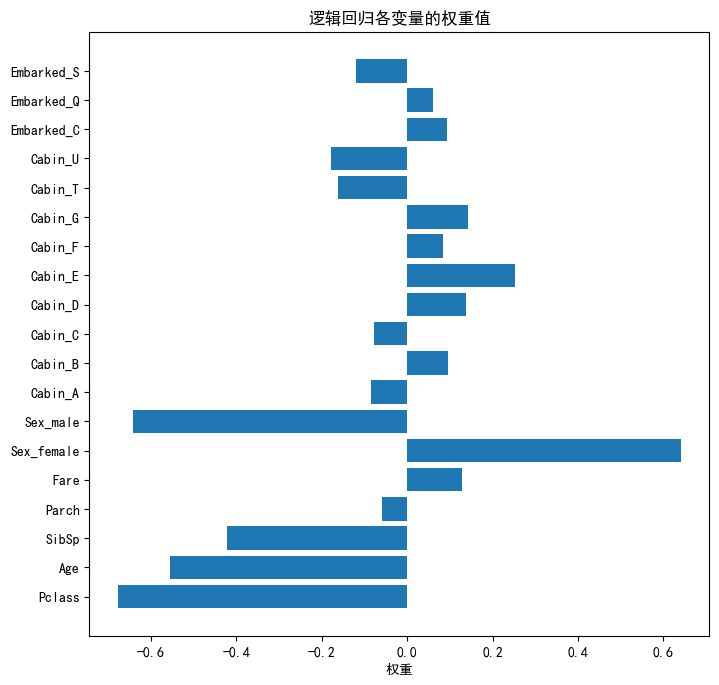

In [43]:
plt.figure(figsize=(8,8),dpi = 100)
plt.barh(bar_x,bar_y)  # 水平柱状图
plt.xlabel('权重')
plt.title('逻辑回归各变量的权重值')

## 2.7	建模结论

- 从重要度的图里面，可以看出：客舱等级、性别、年龄，是是否能够获救的最重要的三个因素。  